In [1]:
# Import packages
import sys
import os
import pickle
from datetime import date, datetime
from time import strftime

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import pandas as pd
from parameters import ParameterSet
from IPython.display import clear_output

from motor import simulation_parameters
from motor.simulation import gillespie
from motor.plot_kymograph import plot_kymograph as plotf

In [2]:
# Load simulation parameters from motor/simulation_parameters
simPa = ParameterSet(simulation_parameters.simParameters)


In [3]:
ROOT = os.getcwd()
sys.path.insert(0, ROOT)

# Setup data recording variables
DATE = str(date.today())
TIME = str(strftime('%X'))
TIME = TIME.replace(':', '-')

# Create output folder
PATH_RESULTS = ROOT + '\\SIM_RUNS\\' + DATE + '__' + TIME
if simPa.record_data:
    os.makedirs(foldername)

In [4]:
RESULTS = pd.DataFrame(columns=['Time', 'Lattice','Concentration', 'Length', 'Frametime', 'Type', 'Stepsize', 'Rates', 'Datestamp', 'Timestamp'])
rates = [simPa.concentration*simPa.k_on, simPa.k_off, simPa.k_off_end, simPa.k_hop]
update = 0        

# Setup parameter scanning
if simPa.scan:    
    simPa.scan_range = simPa.length_range
else:
    simPa.scan_range = [simPa.length]
    
# Loop over different lattice lengths    
for length in simPa.scan_range:    
    simPa.length = length  # Update lattice size     
    for run in range(simPa.num_sims):

        clear_output(wait=True)    
        # Call Gillespie simulation
        [lattice, time] = gillespie(simPa) 

        # Store results as pandas.DataFrame        
        data = {
                'Time': np.asarray(time), 'Lattice': np.asarray(lattice), 
                'Concentration': simPa.concentration, 'Length': simPa.length, 
                'Frametime': simPa.frame_time, 'Type': simPa.type, 'Stepsize': simPa.step_size,
                'Rates': np.round(rates,4), 'Datestamp': DATE, 'Timestamp': TIME.replace('-', ':')
               }
        RESULTS = RESULTS.append(data, ignore_index=True)                                 

        # Update progress report
        update += 1
        print("Current progress:",np.round(update/(len(simPa.scan_range)*simPa.num_sims) *100, 2),"%")    


Current progress: 100.0 %


In [ ]:
# Store results
if simPa.record_data:   
    save_results(RESULTS, PATH_RESULTS, simPa)

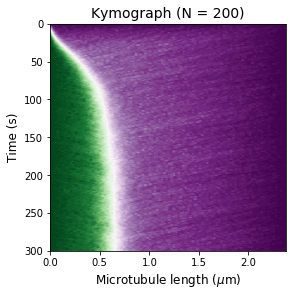

In [5]:

plotf(RESULTS, PATH_RESULTS, simPa)